In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_excel('Air_BNB.xlsx')

In [3]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [6]:
print("The number of colums is",df.shape[1])
print("The number of rows is",df.shape[0])

The number of colums is 10
The number of rows is 74111


In [7]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [8]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [9]:
df.tail(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74101,Private room,1.0,1.0,moderate,1.0,f,90.0,1.0,1.0,4.584967
74102,Shared room,10.0,3.0,flexible,0.0,f,80.0,1.0,10.0,4.110874
74103,Entire home/apt,2.0,1.0,moderate,1.0,f,98.0,1.0,1.0,5.135798
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74105,Private room,2.0,1.0,moderate,1.0,f,91.0,1.0,1.0,4.248495
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [11]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [12]:
df['room_type'].nunique()

3

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

CANCELLATION_POLICY : 3

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

INSTANT_BOOKABLE : 3

f    54660
t    19451
Name: instant_bookable, dtype: int64



In [14]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [15]:
df_2 = df.copy()

In [16]:
df_2.drop_duplicates(inplace=True)

In [17]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [18]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

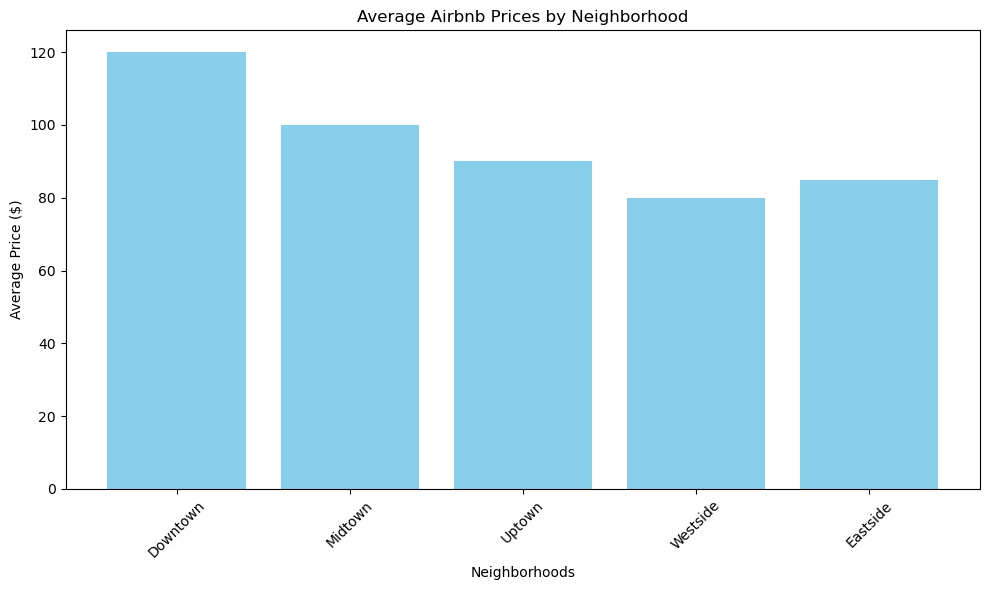

In [19]:
import matplotlib.pyplot as plt

# Sample data representing average prices of Airbnb listings in different neighborhoods
neighborhoods = ['Downtown', 'Midtown', 'Uptown', 'Westside', 'Eastside']
average_prices = [120, 100, 90, 80, 85]  # in dollars

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.bar(neighborhoods, average_prices, color='skyblue')

# Adding labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Average Price ($)')
plt.title('Average Airbnb Prices by Neighborhood')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


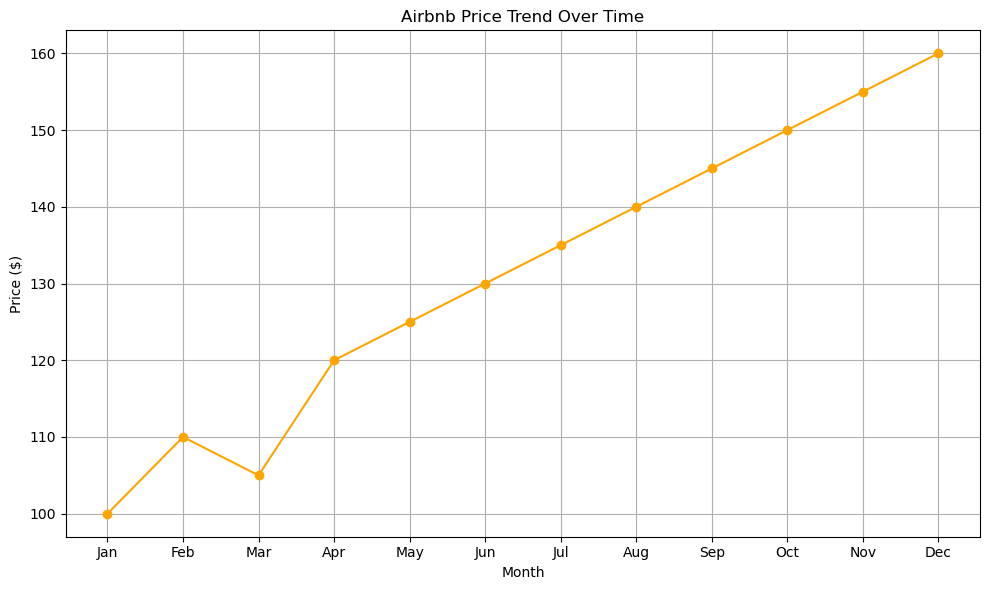

In [20]:
import matplotlib.pyplot as plt

# Sample data representing Airbnb prices over time (months)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
prices = [100, 110, 105, 120, 125, 130, 135, 140, 145, 150, 155, 160]  # in dollars

# Creating the line plot
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.plot(months, prices, marker='o', color='orange', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.title('Airbnb Price Trend Over Time')

# Adding grid lines for better readability
plt.grid(True)

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


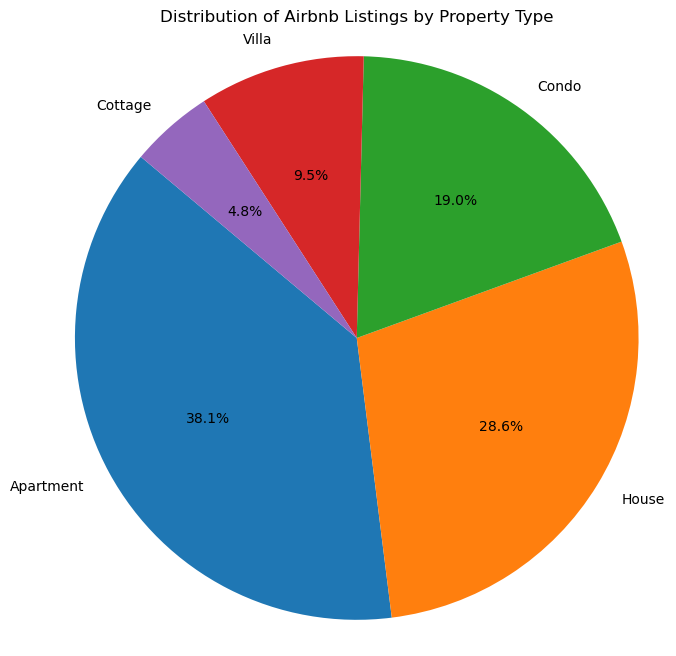

In [21]:
import matplotlib.pyplot as plt

# Sample data representing distribution of Airbnb listings across property types
property_types = ['Apartment', 'House', 'Condo', 'Villa', 'Cottage']
listing_counts = [400, 300, 200, 100, 50]

# Creating the pie chart
plt.figure(figsize=(8, 8))  # Setting the figure size
plt.pie(listing_counts, labels=property_types, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Airbnb Listings by Property Type')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


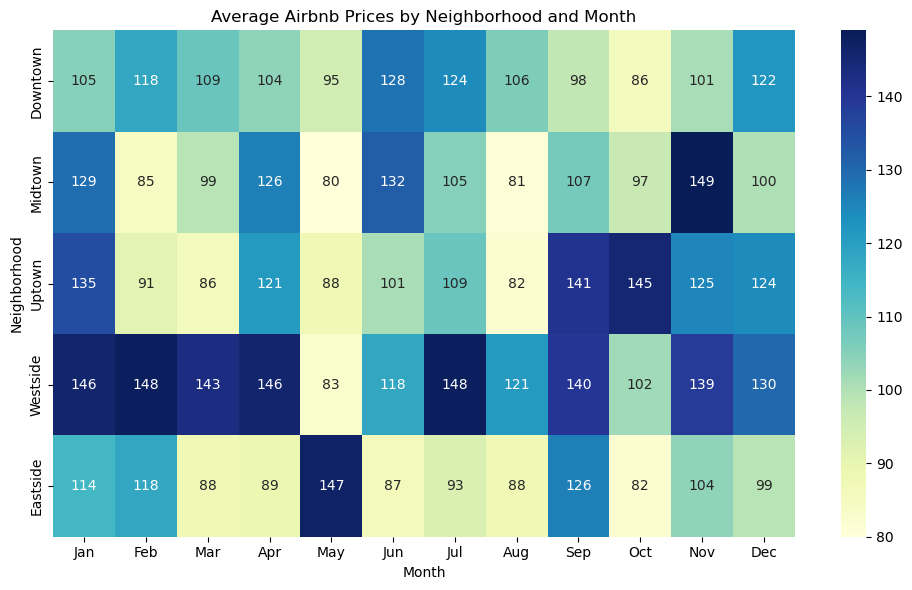

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data representing average prices of Airbnb listings in different neighborhoods over time
neighborhoods = ['Downtown', 'Midtown', 'Uptown', 'Westside', 'Eastside']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
prices = np.random.randint(80, 150, size=(len(neighborhoods), len(months)))  # Random prices for demonstration

# Creating the heatmap
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.heatmap(prices, annot=True, fmt="d", cmap="YlGnBu", xticklabels=months, yticklabels=neighborhoods)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Neighborhood')
plt.title('Average Airbnb Prices by Neighborhood and Month')

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
